In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
!pip install --upgrade tensorflow

In [6]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

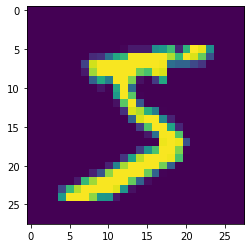

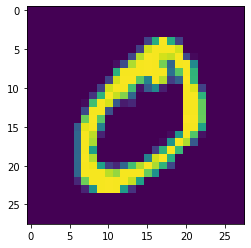

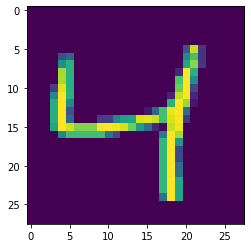

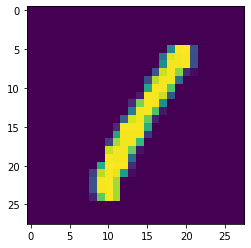

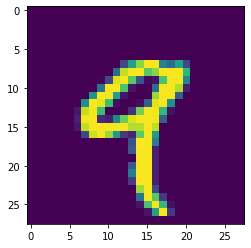

In [10]:
for i in range(5):
    plt.imshow(x_train[i])
    plt.show()

In [15]:
x_train.shape

(60000, 28, 28)

![](https://www.allaboutcircuits.com/uploads/thumbnails/how-to-train-a-basic-perceptron-neural-network_rk_aac_image1.jpg)

In [3]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model

In [5]:
loss = SparseCategoricalCrossentropy()

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1:])))
model.add(Flatten())
model.add(Dense(256, activation='sigmoid', kernel_initializer='normal'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)

In [10]:
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=100, validation_split=0.2, 
                    verbose=2, callbacks=[early_stop])

Epoch 1/100
750/750 - 2s - loss: 1.4791 - accuracy: 0.5548 - val_loss: 0.7944 - val_accuracy: 0.7563
Epoch 2/100
750/750 - 2s - loss: 0.5844 - accuracy: 0.8484 - val_loss: 0.3878 - val_accuracy: 0.9275
Epoch 3/100
750/750 - 2s - loss: 0.3049 - accuracy: 0.9379 - val_loss: 0.2478 - val_accuracy: 0.9461
Epoch 4/100
750/750 - 2s - loss: 0.1973 - accuracy: 0.9560 - val_loss: 0.1882 - val_accuracy: 0.9551
Epoch 5/100
750/750 - 2s - loss: 0.1445 - accuracy: 0.9664 - val_loss: 0.1609 - val_accuracy: 0.9607
Epoch 6/100
750/750 - 2s - loss: 0.1156 - accuracy: 0.9723 - val_loss: 0.1362 - val_accuracy: 0.9660
Epoch 7/100
750/750 - 2s - loss: 0.0924 - accuracy: 0.9781 - val_loss: 0.1415 - val_accuracy: 0.9647
Epoch 8/100
750/750 - 2s - loss: 0.0782 - accuracy: 0.9810 - val_loss: 0.1230 - val_accuracy: 0.9691
Epoch 9/100
750/750 - 2s - loss: 0.0644 - accuracy: 0.9845 - val_loss: 0.1378 - val_accuracy: 0.9671
Epoch 10/100
750/750 - 2s - loss: 0.0557 - accuracy: 0.9862 - val_loss: 0.1143 - val_accura

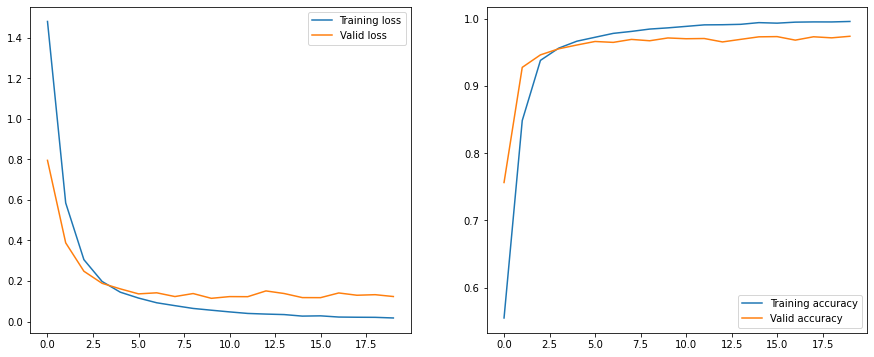

In [11]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Valid loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Valid accuracy')
plt.legend()
plt.show()

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss} - Accuracy: {accuracy * 100}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1238 - accuracy: 0.9733
Loss: 0.12377990782260895 - Accuracy: 97.32999801635742


## Functional 